In [1]:
import nanomotif as nm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl
from polars import col, lit
import itertools

In [43]:
a_b = itertools.product(range(10, 500), range(10,500))
df = pl.concat([pl.DataFrame({"model":nm.model.BetaBernoulliModel(a, b), "a":a,"b":b}) for a, b in a_b])
df = df.with_columns([
    col("model").apply(lambda x: x.mean()).alias("mean"),
    col("model").apply(lambda x: x.standard_deviation()).alias("sd"),
    col("model").apply(lambda x: x.cdf(0.5)).alias("cdf_0_5")
])

/shared_software/podman/tmp/lx38ll@bio.aau.dk/ipykernel_3419783/2949240831.py:4: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_elements`.
  col("model").apply(lambda x: x.mean()).alias("mean"),
/shared_software/podman/tmp/lx38ll@bio.aau.dk/ipykernel_3419783/2949240831.py:5: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_elements`.
  col("model").apply(lambda x: x.standard_deviation()).alias("sd"),
/shared_software/podman/tmp/lx38ll@bio.aau.dk/ipykernel_3419783/2949240831.py:6: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_elements`.
  col("model").apply(lambda x: x.cdf(0.5)).alias("cdf_0_5")


DEBUG: locator: <matplotlib.ticker.AutoLocator object at 0x7fa8e8880370>
DEBUG: locator: <matplotlib.ticker.AutoLocator object at 0x7fa728d77160>
DEBUG: locator: <matplotlib.ticker.AutoLocator object at 0x7fa728b09310>
DEBUG: locator: <matplotlib.ticker.AutoLocator object at 0x7fa728d09ee0>


<Axes: xlabel='b', ylabel='a'>

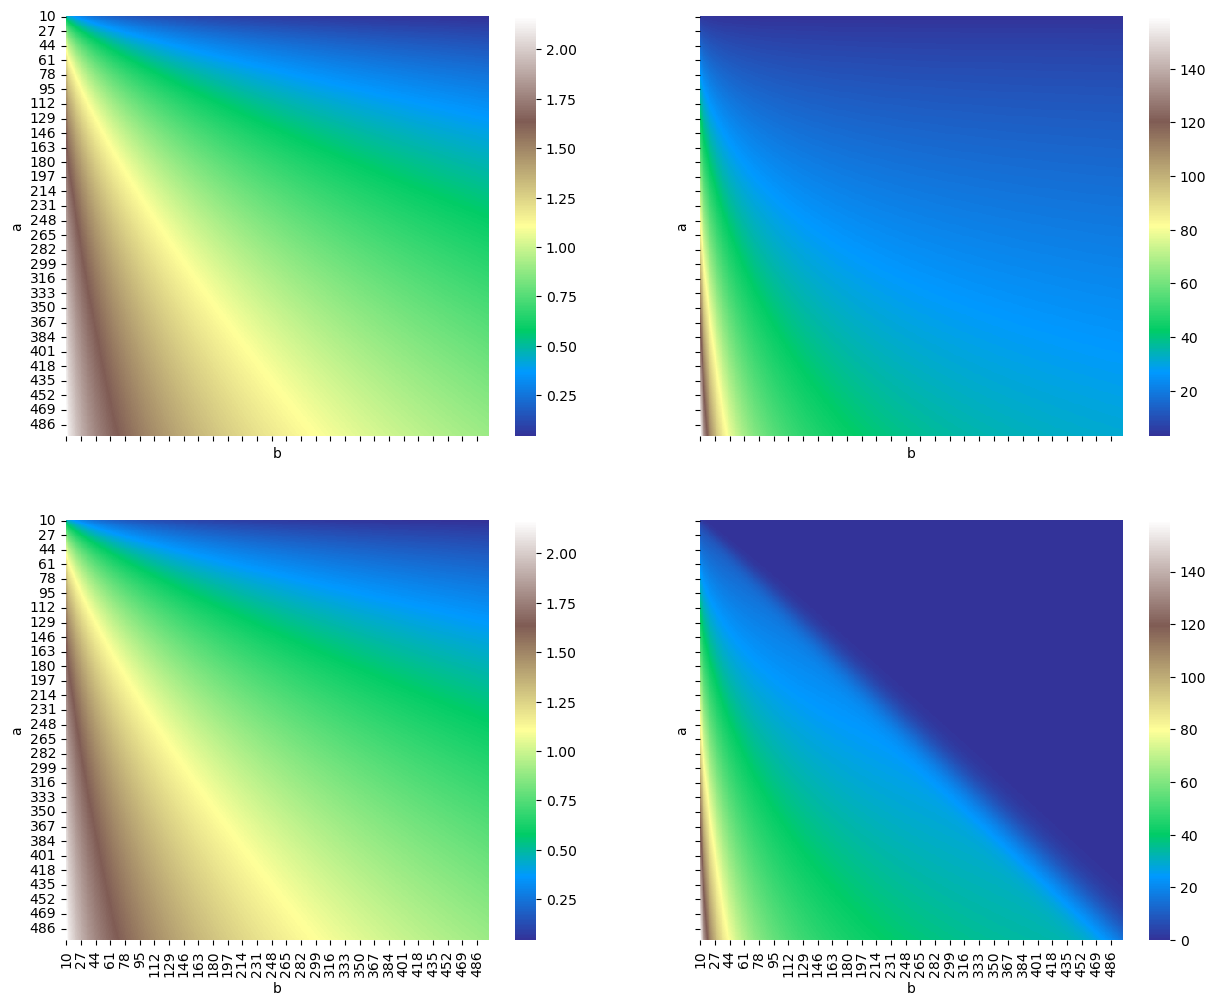

In [44]:
df_heuristic = df.with_columns([
    (col("mean") / col("sd")).alias("signal_to_noise"),
    (col("mean") * (-col("sd").log10())).alias("sd_negative_log"),
    (col("mean") / (col("sd").sqrt())).alias("sd_sqrt"),
    ((1-col("cdf_0_5")) * col("mean") / col("sd")).alias("signal_to_noise_cdf_filter"),
])
fig, axs = plt.subplots(2, 2, figsize=(15,12), sharex=True, sharey=True)
sns.heatmap(df_heuristic.to_pandas() \
    .pivot(index="a", columns="b", values="sd_negative_log") \
    .fillna(0),
    cmap="terrain",
    ax = axs[0,0])
sns.heatmap(df_heuristic.to_pandas() \
    .pivot(index="a", columns="b", values="signal_to_noise") \
    .fillna(0),
    cmap="terrain",
    ax = axs[0,1])
sns.heatmap(df_heuristic.to_pandas() \
    .pivot(index="a", columns="b", values="sd_negative_log") \
    .fillna(0),
    cmap="terrain",
    ax = axs[1,0])
sns.heatmap(df_heuristic.to_pandas() \
    .pivot(index="a", columns="b", values="signal_to_noise_cdf_filter") \
    .fillna(0),
    cmap="terrain",
    ax = axs[1,1])


In [36]:
df_heuristic

model,a,b,mean,sd,cdf_0_1,signal_to_noise,sd_negative_log,sd_sqrt,signal_to_noise_cdf_filter
object,i64,i64,f64,f64,f64,f64,f64,f64,f64
"BetaBernoulliModel(alpha=10, beta=10)",10,10,0.5,0.109109,0.000004,4.582576,0.48107,1.5137,0.000018
"BetaBernoulliModel(alpha=10, beta=11)",10,11,0.47619,0.106479,0.000007,4.472136,0.463207,1.459311,0.000032
"BetaBernoulliModel(alpha=10, beta=12)",10,12,0.454545,0.103825,0.000012,4.377975,0.447135,1.41067,0.000054
"BetaBernoulliModel(alpha=10, beta=13)",10,13,0.434783,0.10119,0.000021,4.296689,0.432549,1.366794,0.000089
"BetaBernoulliModel(alpha=10, beta=14)",10,14,0.416667,0.098601,0.000033,4.225771,0.419216,1.326928,0.000141
"BetaBernoulliModel(alpha=10, beta=15)",10,15,0.4,0.096077,0.000052,4.163332,0.406952,1.290478,0.000217
"BetaBernoulliModel(alpha=10, beta=16)",10,16,0.384615,0.093628,0.000079,4.107919,0.395614,1.256968,0.000324
"BetaBernoulliModel(alpha=10, beta=17)",10,17,0.37037,0.09126,0.000117,4.058397,0.385081,1.226014,0.000474
"BetaBernoulliModel(alpha=10, beta=18)",10,18,0.357143,0.088977,0.000169,4.013865,0.375257,1.197298,0.000678
